In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
dataset = pd.read_csv('heart.csv')
df=dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [8]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [9]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
6,0.180175,0.478391,0.922521,0.146634,0.224643,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
7,-1.143291,-0.663867,0.323431,1.021244,-0.896862,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
8,-0.260980,2.306004,-0.913400,0.540209,-0.465514,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
9,0.290464,1.049520,-1.512490,1.064975,0.483451,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0


In [10]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5,1,'K Neighbors Classifier scores for different K values')

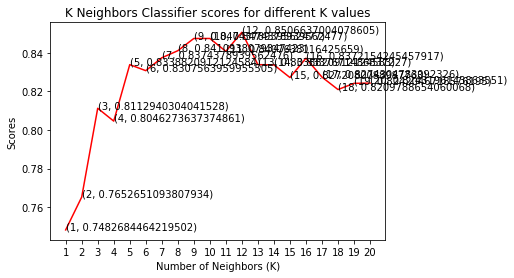

In [11]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [12]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [13]:
score.mean()

0.8506637004078605

In [17]:
#Our features = age - thal
features = df.iloc[:, 0:13]
label = df['target']
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


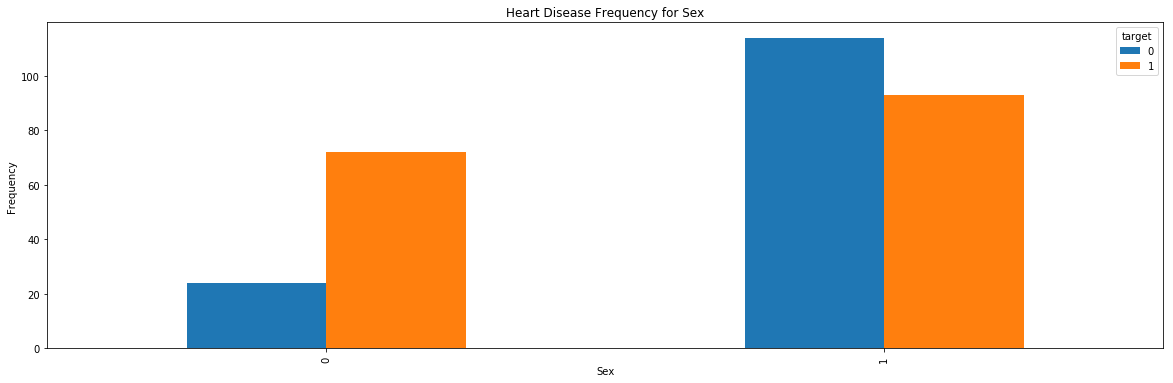

In [18]:
#this is the codebase for generating graph, you don't need to understand it right now. assume it as a block
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

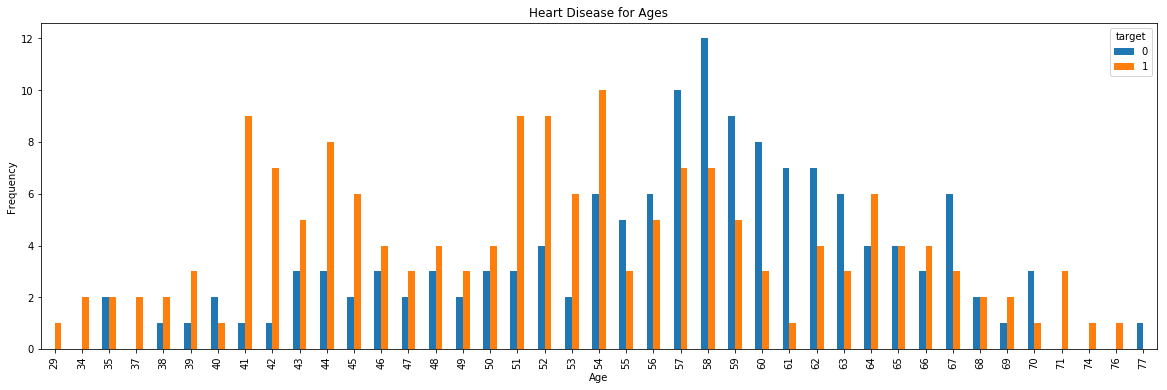

In [19]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [20]:
#we need to shuffle the data then we need split the dataset as training data and testing data
from sklearn.model_selection import train_test_split

In [21]:
#random state is a calculated randomness. Test is 10% and Training is 90%
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=2)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2


In [23]:
#fitting the training dataset to the classifier 
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
#predicting the test dataset through classifier
pred_rand = randomforest_classifier.predict(X_test)
print(pred_rand)

[1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1]


In [26]:
#confusion matrix for random forest
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_rand)
print(cm)

[[12  3]
 [ 0 16]]


In [27]:
#how accurately our Random Forest classifier predicts those test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_rand)

0.9032258064516129